## Problem 1: Visualize a static map (8 points)

Create a static map using the skills you leared in lesson 5. The map should contain multiple layers of data (at least two different data sets), and you should pay attention to the classification and visualization (colors, edges etc.) when creating the map. Write your code into a notebook file (`.ipynb`) or a python script file (`.py`) and store the output map(s) in `.png` format into the `docs` folder.

**Topic of the map:**
- You can either use the data sets we have already used during this course (eg. the Travel Time Matrix, or population grid), or you can select some other data set of your interest (for example, statistics in postal code areas).
- Feel free to adapt examples provided in this course! You can do further calculations based on the datasets or use the analysis outputs that we have done earlier in the course (for example, the dominance areas or travel times for shopping centers). 

**Criteria:**
- The map should have multiple layers on it (for example, the travel time matrix and the road network). Basemap is optional (use a basemap only if it adds useful information / visual touch!)
- The map should portray some kind of classification and/or an analysis output (not just the raw data).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/) (map extent, zoom level, color choices, legend, credit data sources etc.) when plotting the map.

**Output:**
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) as png image in the **`docs`** folder  

In this exercise, I'm calculating the amount of bombs dropped by the Western Allies during the Second World War on contemporary German Federal States. The bombing dataset geospatial dataset was downloaded in .csv format from: https://data.world/datamil/world-war-ii-thor-data/workspace/file?filename=THOR_WWII_DATA_CLEAN.csv. The THOR dataset is compiled by the United States Air Force from digitized war-time flight records. More info: https://www.af.mil/News/Article-Display/Article/466817/historic-airpower-database-now-online/

Firstly I import the data, preform .crs transformations and manage the dataset. After these processing steams, I am aggregating the total tonnage of bombs dropped to contemporary German Federal States, downloaded from https://www.diva-gis.org/gdata (DEU_ADM1.shp). Finally, I'm the results as visualizing _tons of bombs per km2_ for each German Federal State in a choropleth map.

In [1]:
# Import required packages
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely import speedups
import numpy as np
import contextily as ctx

In [3]:
# Read input data
fp = r"data/THOR_WWII_DATA_CLEAN.csv"
data = pd.read_csv(fp, sep=",", encoding='latin1', low_memory=False)
fp = r"data/DEU_adm1.shp"
germany2020 = gpd.read_file(fp)

In [4]:
# Transform input dataframe into geodataframe
geo = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data["LONGITUDE"], data["LATITUDE"]))

In [5]:
# Check if "geo" GeoDataFrame has crs info
geo.crs

In [6]:
# Assign projection to "geo" GeoDataFrame
geo = geo.set_crs(epsg=4326)

# Reproject "geo" GeoDataFrame to metric
geo = geo.to_crs(epsg=32633)

# Reproject "germany2020" GeoDataFrame to metric
germany2020 = germany2020.to_crs(epsg=32633)

In [7]:
# Check that both map and geodataframe have same crs
geo.crs == germany2020.crs

True

In [8]:
# Drop unneccessary fields from "germany2020" GeoDataFrame
germany2020 = germany2020[["NAME_1", "geometry"]]

# Calculate land area for German Federal States
germany2020["area"] = germany2020["geometry"].area/10**6

In [9]:
# Check GeoDataFrame columns
geo.columns

Index(['WWII_ID', 'MASTER_INDEX_NUMBER', 'MSNDATE', 'THEATER', 'NAF',
       'COUNTRY_FLYING_MISSION', 'TGT_COUNTRY_CODE', 'TGT_COUNTRY',
       'TGT_LOCATION', 'TGT_TYPE', 'TGT_ID', 'TGT_INDUSTRY_CODE',
       'TGT_INDUSTRY', 'SOURCE_LATITUDE', 'SOURCE_LONGITUDE', 'LATITUDE',
       'LONGITUDE', 'UNIT_ID', 'MDS', 'AIRCRAFT_NAME', 'MSN_TYPE',
       'TGT_PRIORITY', 'TGT_PRIORITY_EXPLANATION', 'AC_ATTACKING', 'ALTITUDE',
       'ALTITUDE_FEET', 'NUMBER_OF_HE', 'TYPE_OF_HE', 'LBS_HE', 'TONS_OF_HE',
       'NUMBER_OF_IC', 'TYPE_OF_IC', 'LBS_IC', 'TONS_OF_IC', 'NUMBER_OF_FRAG',
       'TYPE_OF_FRAG', 'LBS_FRAG', 'TONS_OF_FRAG', 'TOTAL_LBS', 'TOTAL_TONS',
       'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
       'TAKEOFF_LONGITUDE', 'AC_LOST', 'AC_DAMAGED', 'AC_AIRBORNE',
       'AC_DROPPING', 'TIME_OVER_TARGET', 'SIGHTING_METHOD_CODE',
       'SIGHTING_EXPLANATION', 'BDA', 'CALLSIGN', 'ROUNDS_AMMO',
       'SPARES_RETURN_AC', 'WX_FAIL_AC', 'MECH_FAIL_AC', 'MISC_FAIL_AC',
       

In [10]:
# Select required columns for further analysis
geo = geo[["geometry", "TOTAL_TONS"]]

<AxesSubplot:>

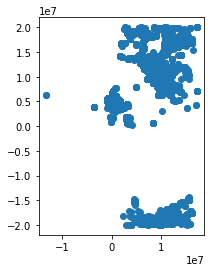

In [11]:
# Visually inspect data (notice outliers)
geo.plot()

In [12]:
# Select points within Germany Federal States and combine GeoDataFrames
ger_bombs = gpd.sjoin(geo, germany2020, op = 'within')

In [13]:
# Visually check combined GeoDataFrame
ger_bombs

,geometry,TOTAL_TONS,index_right,NAME_1,area
11,POINT (392821.289 5821161.996),1.0,2,Berlin,884.865524
12,POINT (392821.289 5821161.996),4.0,2,Berlin,884.865524
651,POINT (392821.289 5821161.996),1.0,2,Berlin,884.865524
652,POINT (392821.289 5821161.996),6.0,2,Berlin,884.865524
1239,POINT (392821.289 5821161.996),1.0,2,Berlin,884.865524
...,...,...,...,...,...
177674,POINT (317476.732 5689782.432),28.0,13,Sachsen,18410.690209
177675,POINT (317476.732 5689782.432),30.0,13,Sachsen,18410.690209
177676,POINT (317476.732 5689782.432),30.0,13,Sachsen,18410.690209
177677,POINT (317476.732 5689782.432),30.0,13,Sachsen,18410.690209


In [14]:
# Select only required columns for further analysis
ger_bombs = ger_bombs[["geometry", "TOTAL_TONS", "NAME_1", "area"]]

In [15]:
# Drop rows containing NaN values
ger_bombs = ger_bombs.dropna()

<AxesSubplot:>

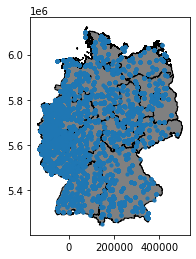

In [16]:
# Visually inspect data
ax = germany2020.plot(facecolor="gray", edgecolor="black")
ger_bombs.plot(ax=ax, markersize=10)

In [17]:
## Data aggregation and calculation
# Aggregate TOTAL_TONS values for each German Federal state
bombs_by_state = ger_bombs.groupby("NAME_1").agg({"TOTAL_TONS" : "sum"})

# Join 
join = germany2020.merge(bombs_by_state, on="NAME_1")

In [18]:
# Calculate total tons per land area
join["TONS_PER_KM2"] = join["TOTAL_TONS"] / join["area"]

In [19]:
# Visually inspect aggregated dataset
join

,NAME_1,geometry,area,TOTAL_TONS,TONS_PER_KM2
0,Baden-Württemberg,"MULTIPOLYGON (((28189.137 5303887.952, 28230.4...",35864.107394,134087.0,3.738752
1,Bayern,"POLYGON ((155332.447 5611099.265, 155698.436 5...",70541.366060,203571.5,2.885846
2,Berlin,"POLYGON ((376007.307 5806014.243, 375181.687 5...",884.865524,104413.0,117.998721
3,Brandenburg,"POLYGON ((425678.204 5928596.809, 425659.173 5...",29445.079889,33663.0,1.143247
4,Bremen,"MULTIPOLYGON (((66735.460 5917886.615, 67532.9...",394.266504,56197.0,142.535568
5,Hamburg,"POLYGON ((174889.422 5963456.014, 174910.249 5...",769.588709,64123.0,83.321129
6,Hessen,"POLYGON ((119379.112 5734401.962, 119761.886 5...",21059.361798,164565.0,7.814339
7,Mecklenburg-Vorpommern,"MULTIPOLYGON (((451469.753 5951585.048, 451469...",23191.726339,44964.0,1.938795
8,Niedersachsen,"MULTIPOLYGON (((-37838.503 5969389.249, -37842...",47842.444284,182479.0,3.814165
9,Nordrhein-Westfalen,"POLYGON ((70522.351 5838336.646, 70890.392 583...",34474.622738,547392.0,15.878114


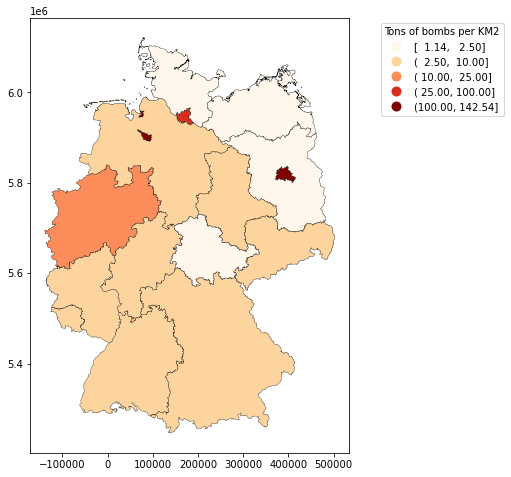

In [20]:
## Plotting
# Adjust figure size
fig, ax = plt.subplots(1, figsize=(10, 8))

# Adjust colors and add a legend
#join.plot(ax=ax, column="TONS_PER_KM2", cmap="OrRd", legend=True, edgecolor='black', linewidth=0.3)
#normalize = matplotlib.colors.Normalize(vmin=join["TONS_PER_KM2"].min(), vmax=join["TONS_PER_KM2"].max())
join.plot(ax=ax, column="TONS_PER_KM2", legend=True, edgecolor='black', cmap="OrRd", scheme='user_defined', classification_kwds={'bins':[ 2.5, 10, 25, 100, join["TONS_PER_KM2"].max()]}, linewidth=0.3)

join["TONS_PER_KM2"].min()

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.5,1))
ax.get_legend().set_title("Tons of bombs per KM2")

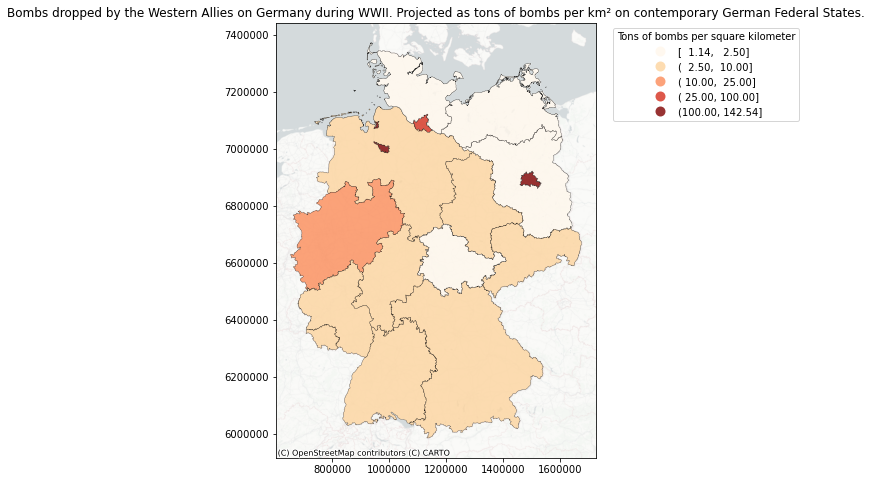

In [24]:
# Reproject to EPSG 3857 to be compatible with basemaps
join_wgs84 = join.to_crs(epsg=3857)

# Adjust figure size
fig, ax = plt.subplots(1, figsize=(15, 8))

# Plot the map and add a legend
join_wgs84.plot(ax=ax, column="TONS_PER_KM2",
                legend=True, edgecolor='black',
                cmap="OrRd", scheme='user_defined',
                linewidth=0.3, alpha=0.8,
                
                # Apply user defined classification to the bombing map
                classification_kwds={'bins':[ 2.5, 10, 25, 100, join["TONS_PER_KM2"].max()]})

# Adjust x axis label style
ax.ticklabel_format(style="plain")
# Set map title
plt.title("Bombs dropped by the Western Allies on Germany during WWII. Projected as tons of bombs per km² on contemporary German Federal States.")

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.65,1))
ax.get_legend().set_title("Tons of bombs per square kilometer")

# Add basemap 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)


In [25]:
output = "docs/WWII_dropped_bombs.png"
fig.savefig(output)